In [1]:
import gym
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
env = gym.make('CartPole-v1')
env.reset()

[2017-06-01 22:43:55,681] Making new env: CartPole-v1


array([ 0.04699663,  0.00403941, -0.04910362, -0.03956925])

In [4]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

In [5]:
def initialize_random_weights(mean, std):
    return np.random.normal(mean, std, 4)
#     return 2 * np.random.random(4) - 1

In [6]:
def get_action(weights, observation):
    weighted_sum = sum([weights[i] * observation[i] for i in range(len(weights))])
    return int(weighted_sum >= 0)

In [7]:
def one_cartpole_run(weights):
    observation = ENV.reset()
    cum_reward = 0
    for t in range(1000):
        action = get_action(weights, observation)
        observation, reward, done, info = ENV.step(action)
        cum_reward += reward
        if done:
            break
    return cum_reward

In [9]:
mean = 0
std = 1
ENV = gym.make('CartPole-v1')

n_iter = 10 ** 3
val_iter = 10 ** 2
best_score = 0
best_weights = []
running_best = [0] * n_iter
current_score = [0] * n_iter
for i in range(n_iter):
    new_weights = initialize_random_weights(mean, std)
    new_score = one_cartpole_run(new_weights)
    if new_score > best_score:
        best_score = new_score
        best_weights = new_weights
    running_best[i] = best_score
    current_score[i] = new_score
    
best_score_validation = 0
for i in range(val_iter):
    best_score_validation += one_cartpole_run(best_weights)
best_score_validation /= float(val_iter)

print best_weights, best_score, best_score_validation

[2017-06-01 22:44:10,147] Making new env: CartPole-v1


[-0.20840373  0.53197822  0.15477657  0.69585578] 500.0 491.03


In [49]:
mean = 0
std = 1
eps = 0.01
ENV = gym.make('CartPole-v1')

n_iter = 10 ** 3
val_iter = 10 ** 2
best_score_2 = 0
running_best_2 = [0] * n_iter
current_score_2 = [0] * n_iter
best_weights_2 = initialize_random_weights(mean, std)
for i in range(n_iter):
    new_weights = best_weights_2 + eps * initialize_random_weights(mean, std)
    new_score = one_cartpole_run(new_weights)
    if new_score > best_score_2:
        best_score_2 = new_score
        best_weights_2 = new_weights
    running_best_2[i] = best_score_2
    current_score_2[i] = new_score
    
best_score_validation = 0
for i in range(val_iter):
    best_score_validation += one_cartpole_run(best_weights_2)
best_score_validation /= float(val_iter)

print best_score_2, best_score_validation

[2017-05-24 18:37:09,792] Making new env: CartPole-v1


114.0 66.31


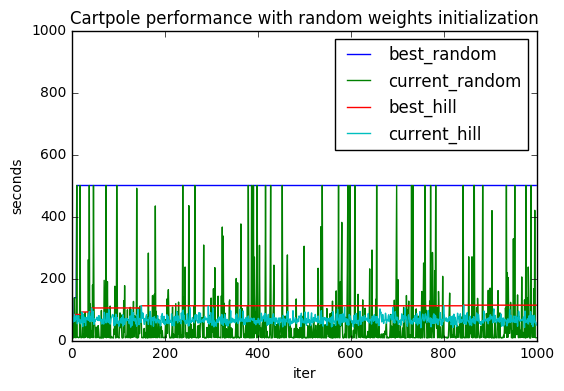

In [50]:
plt.plot(range(n_iter), running_best, label="best_random")
plt.plot(range(n_iter), current_score, label="current_random")
plt.plot(range(n_iter), running_best_2, label="best_hill")
plt.plot(range(n_iter), current_score_2, label="current_hill")
plt.ylabel("seconds")
plt.xlabel("iter")
plt.legend(loc="best")
plt.title("Cartpole performance with random weights initialization")
plt.ylim([0, 1000])
plt.show()

[2017-05-24 18:23:40,012] Making new env: CartPole-v0



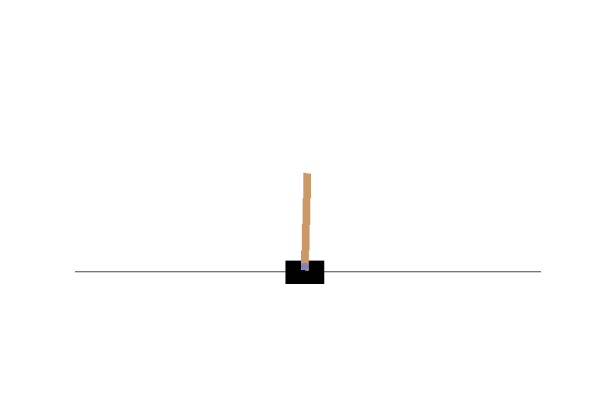
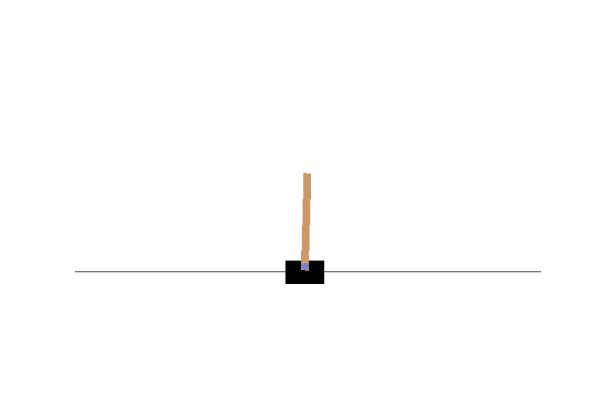
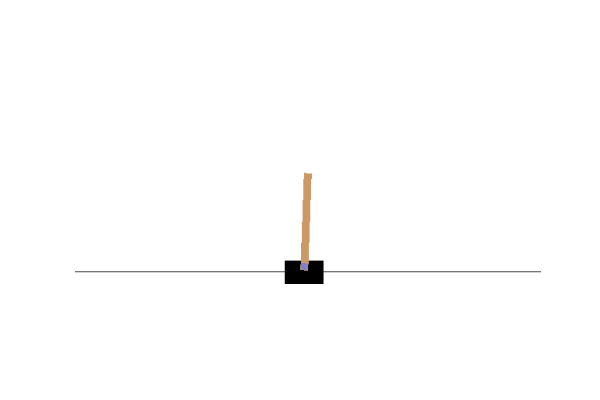
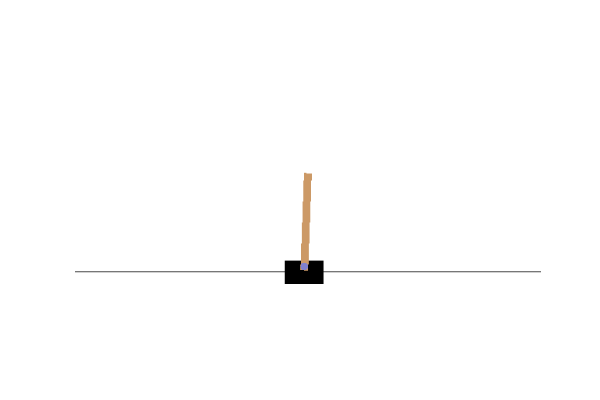
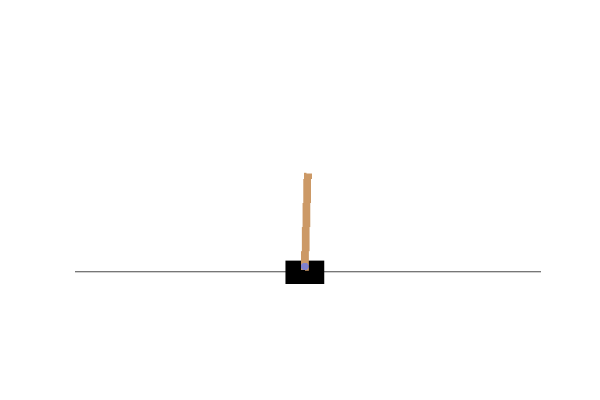
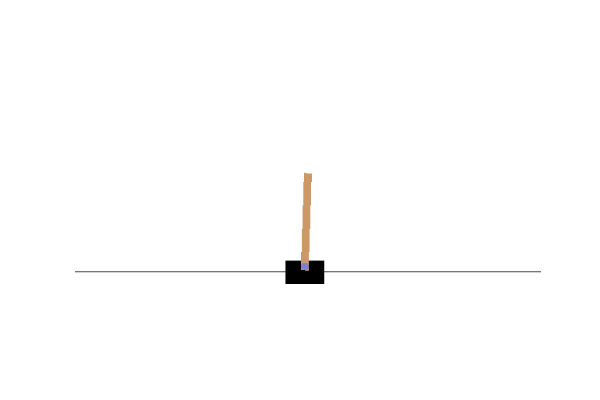
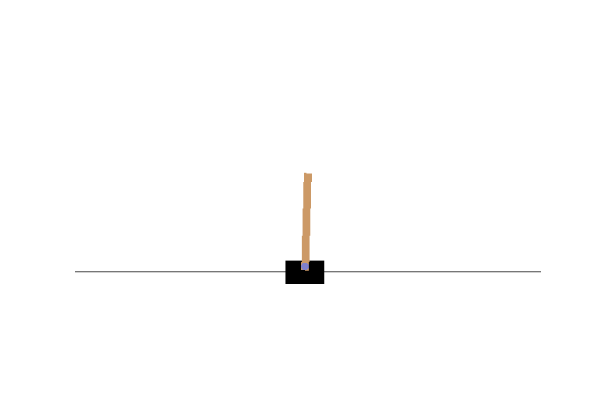
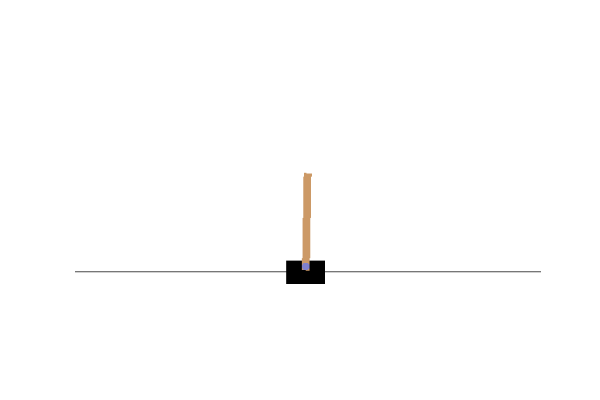
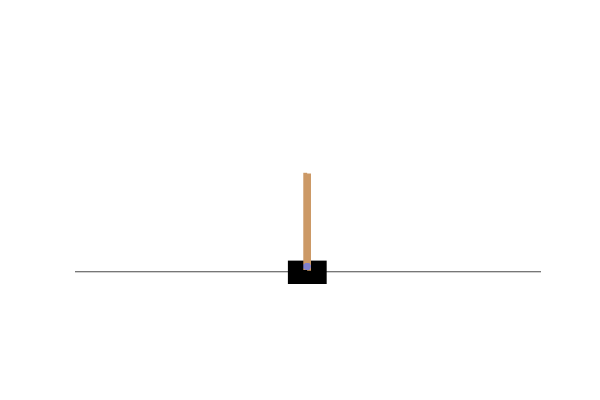
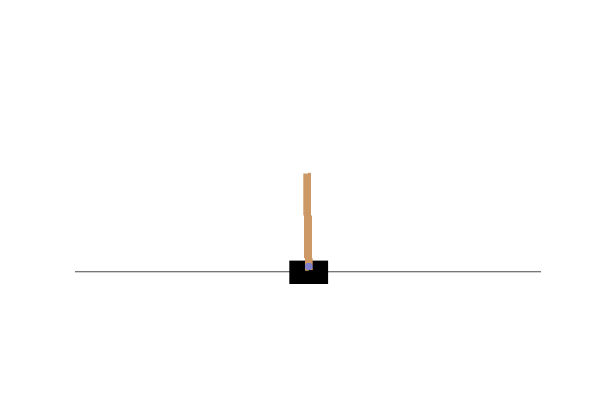
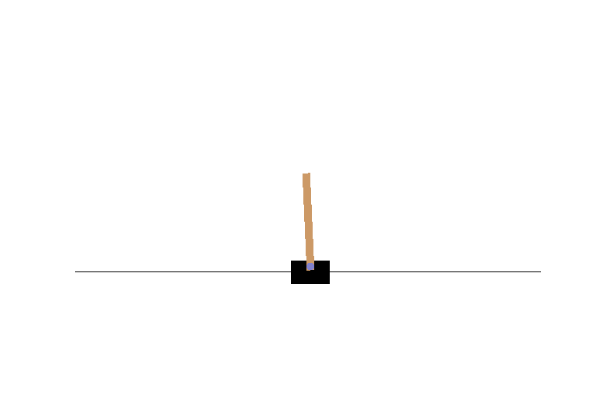
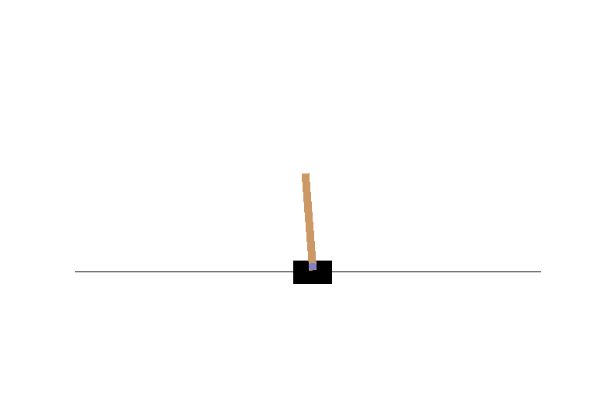
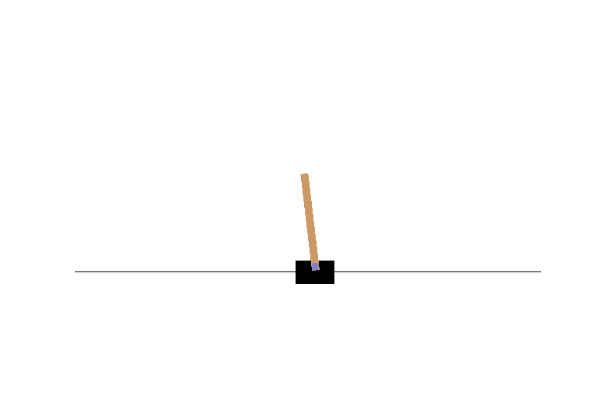
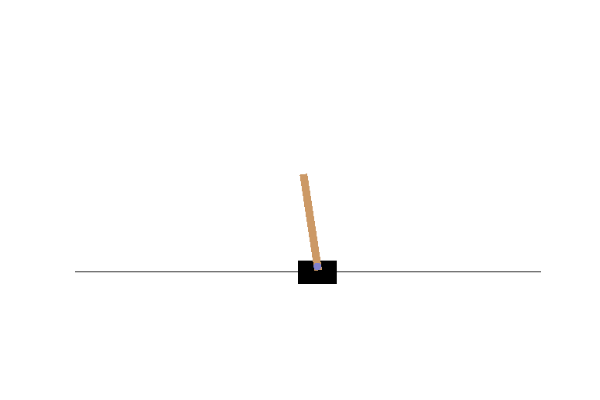
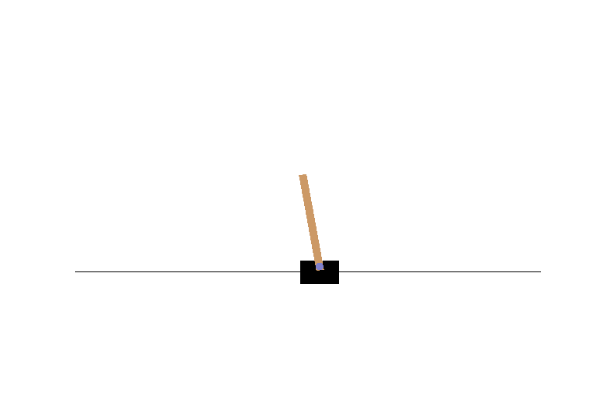

In [10]:
env = gym.make('CartPole-v1')

# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(1000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render(close=True)
display_frames_as_gif(frames)